In [26]:
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from matplotlib import style

In [5]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

C:\Users\TUG GAMING\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
test_data = pd.read_csv("test.csv")

In [7]:
train_data = pd.read_csv("train.csv")

In [12]:
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train_data.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
cabin,687,77.1
age,177,19.9
embarked,2,0.2
survived,0,0.0
pclass,0,0.0


# We will use embarked column as it has only 2 missing value and will be east to wrok with

In [21]:
train_data.columns.values

array(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'], dtype=object)

<AxesSubplot:ylabel='survived'>

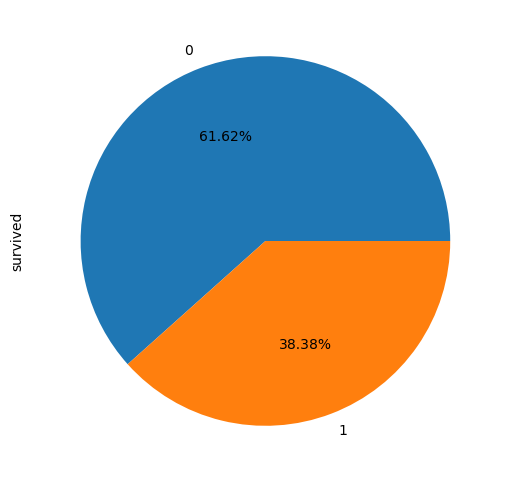

In [31]:
fig = plt.figure(figsize=(6,6))
train_data['survived'].value_counts().plot.pie(autopct = '%1.2f%%')

In [44]:

train_data.dropna(subset=['embarked'], inplace = True)



In [46]:
train_data['cabin'] = train_data['cabin'].fillna('U0') 

In [48]:
from sklearn.ensemble import RandomForestRegressor

age_df = train_data[['age','survived','fare', 'parch', 'sibsp', 'pclass']]
age_df_notnull = age_df.loc[(train_data['age'].notnull())]
age_df_isnull = age_df.loc[(train_data['age'].isnull())]
X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]
# use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=1000,n_jobs=-1)
RFR.fit(X,Y)
predictAges = RFR.predict(age_df_isnull.values[:,1:])
train_data.loc[train_data['age'].isnull(), ['age']]= predictAges

In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       891 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     891 non-null    object 
 10  embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [52]:
train_data.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

<AxesSubplot:xlabel='sex'>

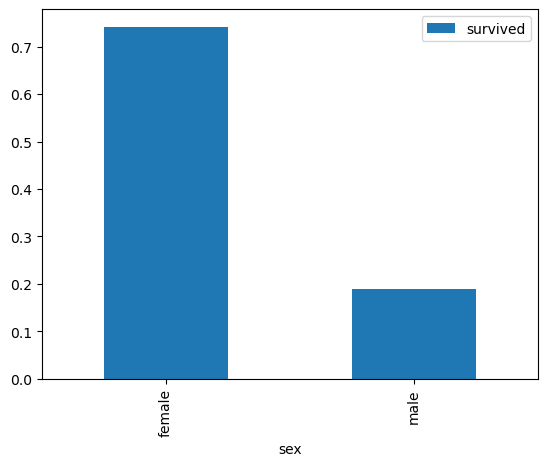

In [53]:
survived_by_sex = train_data[['sex','survived']].groupby('sex').mean()
type(survived_by_sex)
survived_by_sex.plot.bar()

In [54]:
train_data.groupby(['pclass','survived'])['pclass'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: pclass, dtype: int64

<AxesSubplot:xlabel='pclass'>

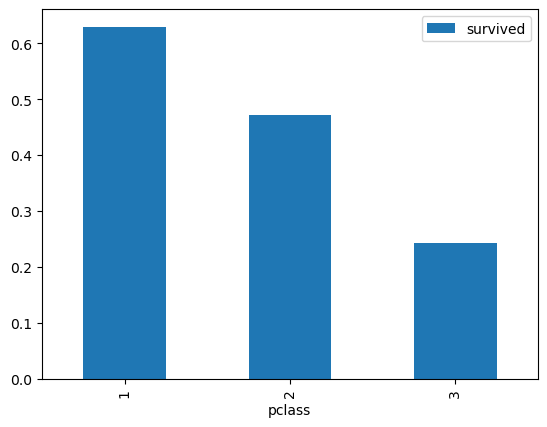

In [55]:
train_data[['pclass','survived']].groupby(['pclass']).mean().plot.bar()

In [56]:
train_data.groupby(['sex', 'pclass', 'survived'])['survived'].count()

sex     pclass  survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: survived, dtype: int64

<AxesSubplot:xlabel='pclass,sex'>

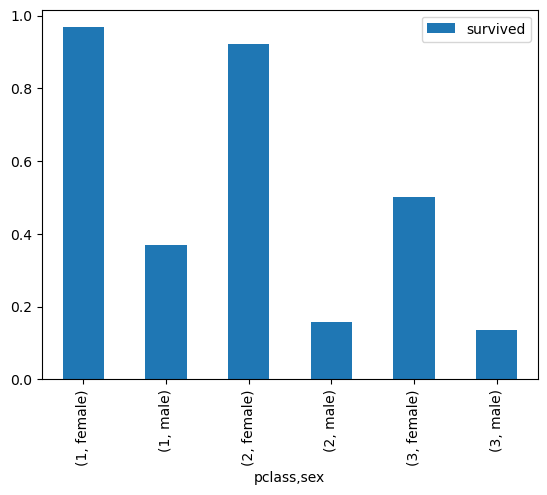

In [58]:
train_data[['sex','pclass','survived']].groupby(['pclass','sex']).mean().plot.bar()

C:\Users\TUG GAMING\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='age'>

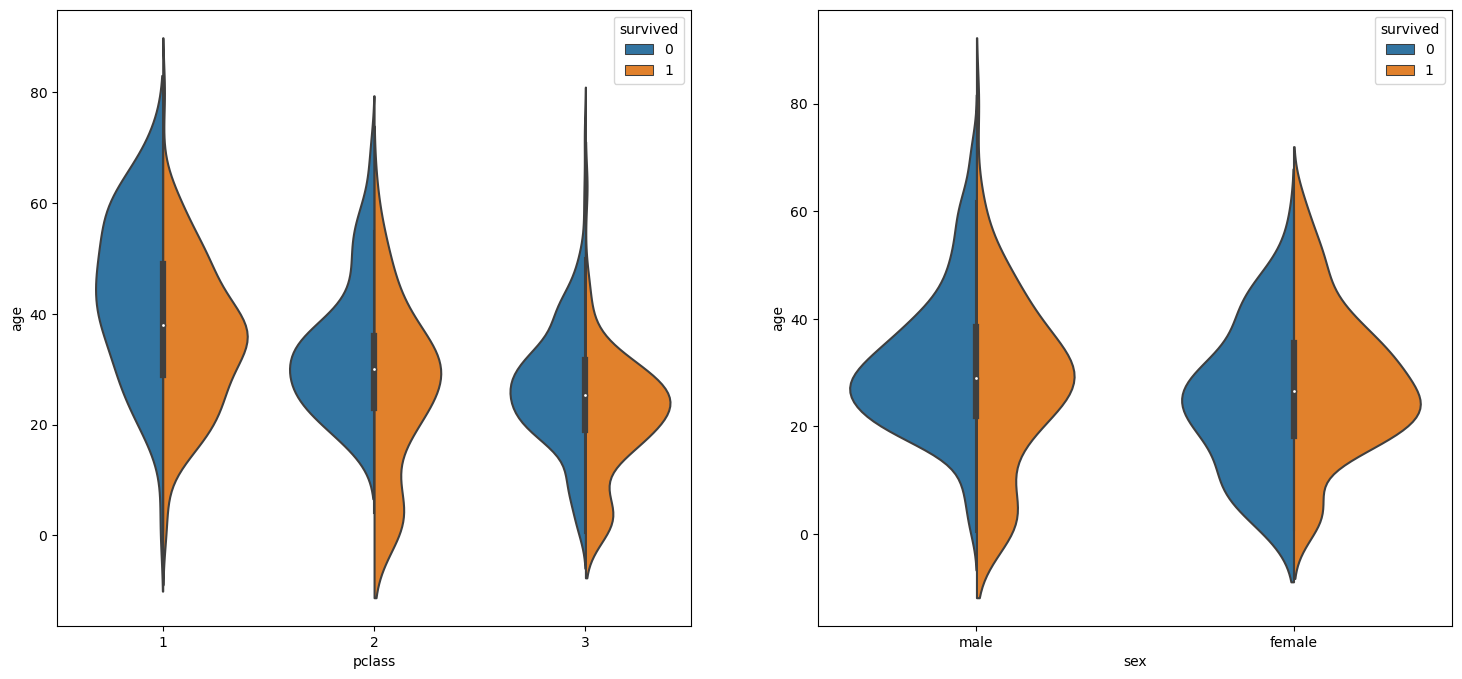

In [60]:
fig, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("pclass","age",hue="survived",data=train_data, split=True, ax=ax[0])
sns.violinplot("sex", "age", hue="survived", data=train_data, split=True, ax=ax[1])

<AxesSubplot:>

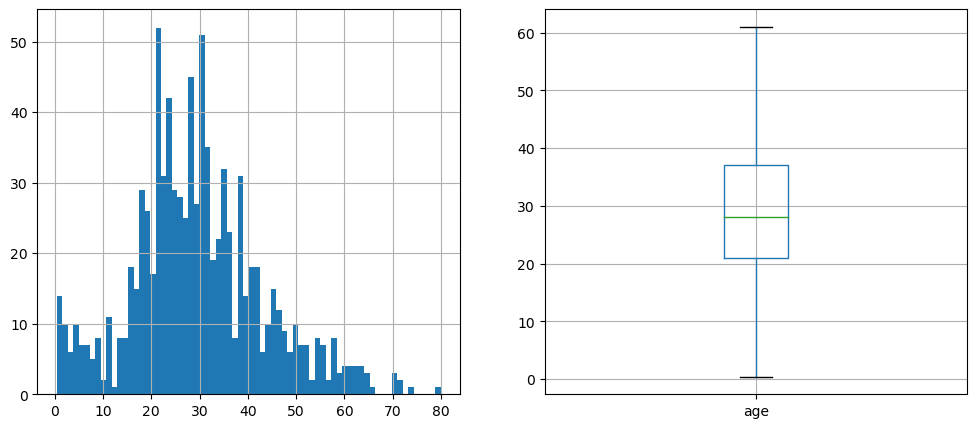

In [62]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train_data['age'].hist(bins=70)

plt.subplot(122)
train_data.boxplot(column='age', showfliers=False)

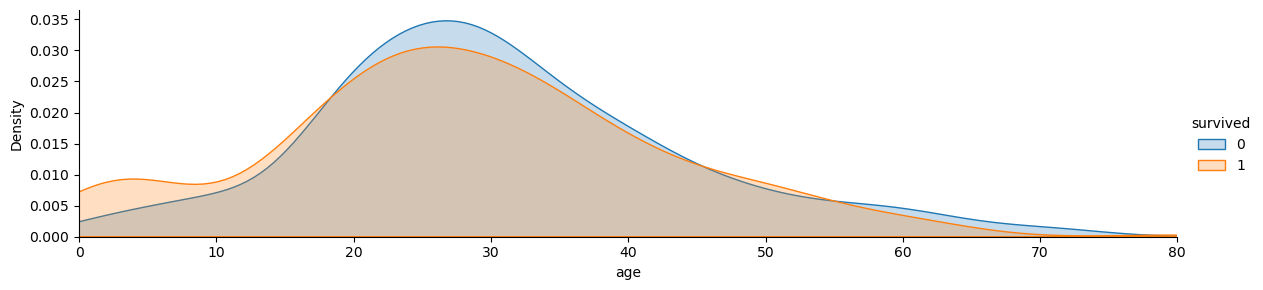

In [64]:
facet = sns.FacetGrid(train_data,hue='survived',aspect=4)
facet.map(sns.kdeplot, 'age', shade=True)
facet.set(xlim=(0, train_data['age'].max()))
facet.add_legend()